# Représentation de signaux

- Ubuntu, lancer un terminal et taper "jupyter lab" (avec un y)
- Présentation de Python:
  - langage de plus en plus répandu, pas seulement scientifique
  - Anaconda = distribution avec python, modules, logiciels (IDE)
  - Notre IDE : Jupyter Notebook/Lab
  - Notebook (d'où Jupyter) : cellules, peuvent s'exécuter dans n'importe quel ordre
    (exemple : a=1 / a=a+1 / print(a)) + markdown (et utilité : commentaires, rapports)

Par convention, les importations de modules sont faites en début de notebook.

In [1]:
import numpy as np                    # Calcul et fonctions scientifiques
import matplotlib.pyplot as plt       # Affichage
import scipy.io.wavfile as wavfile    # Lecture d'un fichier audio

In [2]:
import matplotlib as mpl
mpl.rcParams['axes.grid'] = True

## Signal sinusoïdal

On modifie le code de l'énoncé...

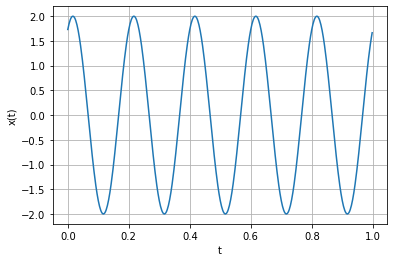

In [3]:
# Vecteur des abscisses : un point tous les 2 ms entre 0 et 1 s
t = np.arange(0, 1, 2e-3)

# Paramètres
A = 2
f = 5
phi = np.pi/3

# Sinusoïde
x = A * np.sin(2*np.pi*f*t + phi)

# Affichage
plt.plot(t,x)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.show()

## Sinusoïde amortie

De nouveau, on s'inspire du code précédent...

L'exponentielle (`numpy.exp`) et le sinus sont calculés en deux instructions pour plus de clarté.

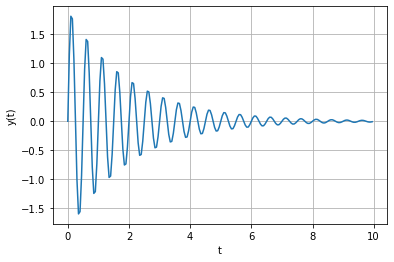

In [4]:
# Vecteur des abscisses : un point tous les 0,05 s entre 0 et 10 s
t = np.arange(0, 10, .05)

# Paramètres
A = 2
a = 0.5
f = 2

# Sinusoïde amortie
expo = np.exp(-a*t)
sinus = np.sin(2*np.pi*f*t)
y = A * expo * sinus

# Affichage
plt.plot(t,y)
plt.xlabel("t")
plt.ylabel("y(t)")
plt.show()

Quelle est l'influence des paramètres ?

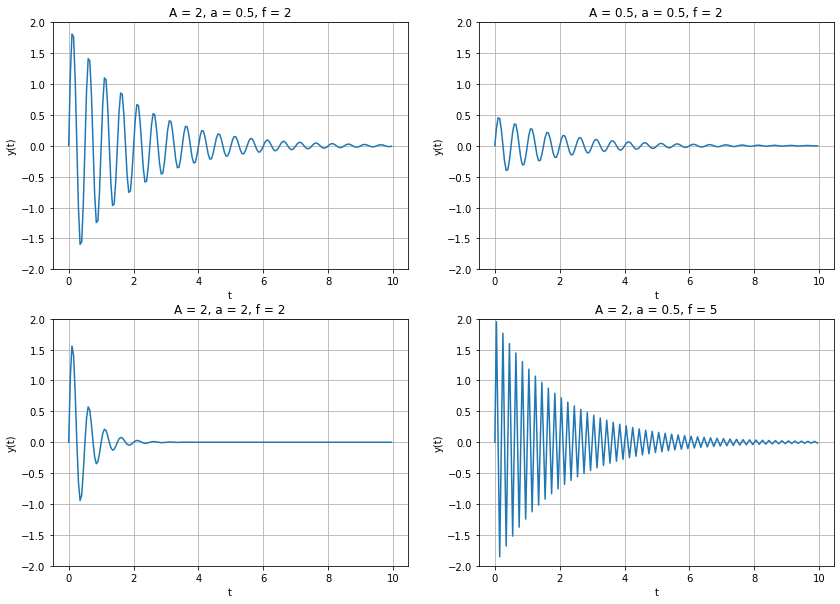

In [5]:
A = [  2, .5, 2,  2 ]
a = [ .5, .5, 2, .5 ]
f = [  2,  2, 2,  5 ]

plt.figure(figsize=(14,10))

for i in range(len(A)):
    y = A[i] * np.exp(-a[i]*t) * np.sin(2*np.pi*f[i]*t)
    plt.subplot(2,2,i+1)
    plt.plot(t,y)
    plt.ylim([-2, 2])
    plt.xlabel("t")
    plt.ylabel("y(t)")
    plt.title(f"A = {A[i]}, a = {a[i]}, f = {f[i]}")
    
plt.show()

## Porte

N'oubliez pas : une porte ou une impulsion peuvent être définies avec `numpy.where`.

Pour ne pas m'embêter, je recopie la définition du signal porte, en redéfinissant les abscisses.

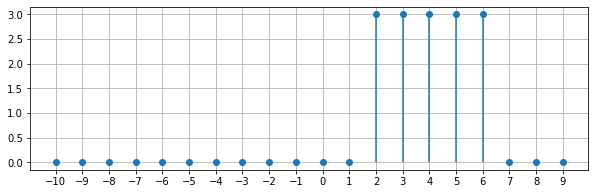

In [9]:
# paramètres
A, m, N = 3, 4, 5

# Abscisses
n = np.arange(-10, 10)

# Signal
n2 = (n-m) / N
z = 3 * np.where( (n2>=-.5) & (n2<=.5) , 1, 0)

# Affichage
plt.figure(figsize=(10,3))
plt.stem(n, z, basefmt=" ")
plt.xticks(n)
plt.show()

## Fichier pluie.wav

La fonction `wavfile.read` permet de charger un signal sonore, qu'on peut afficher comme n'importe quel signal.

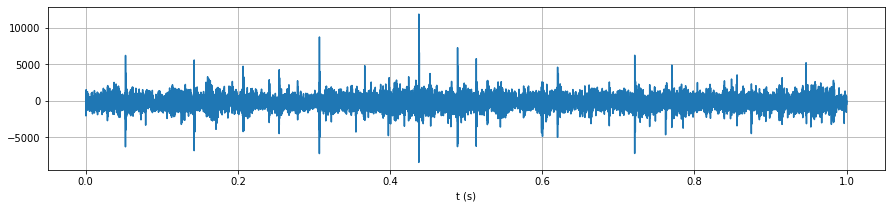

In [7]:
fe, x = wavfile.read("../_static/pluie.wav")
x = x[:,0]
n = np.arange(len(x))
t = n/fe
fig = plt.figure(figsize=(15,3))
plt.plot(t,x)
plt.xlabel('t (s)')
plt.show()

Pour écouter le son...

In [8]:
from IPython.display import Audio
Audio(x, rate=fe)